### 본격적인 초록 분석

#### 1. 우선 단어 빈도 파악

In [54]:
import pandas as pd
from konlpy.tag import Komoran
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./data/articles_essential_refined.csv', encoding='utf-8')
dataset.head()

,title,author,year,vol,no,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"김 영 신 , 김동민",2019,21,21,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,박환영,2019,21,21,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"이 혜 민 , 소혜진",2019,21,21,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"최혜진 , 황은영",2019,21,21,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"김동민 , 정 종 현 , 소라엘 , 최지엘 , 김 영 신",2019,21,21,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...


In [4]:
sr_abstract = dataset['abstract']
sr_abstract.head()

0    본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1    본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,...
2    본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3    본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4    본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...
Name: abstract, dtype: object

In [7]:
dictionary = pd.read_csv('./data/dictionary.tsv', sep='\t', encoding='utf-8')
dictionary.head()

,keyword,frequency
0,음악치료,30
1,음악치료사,27
2,메타분석,9
3,현상학적 연구,9
4,불안,7


In [8]:
dictionary = dictionary.drop('frequency', axis=1)
dictionary['pos'] = 'NNG'
dictionary.head()

,keyword,pos
0,음악치료,NNG
1,음악치료사,NNG
2,메타분석,NNG
3,현상학적 연구,NNG
4,불안,NNG


In [9]:
dictionary.to_csv('./data/dictionary_pos.tsv', sep='\t', index=False, header=False)

2. Komoran 분석

In [13]:
komoran = Komoran(userdic='./data/dictionary_pos.tsv')

In [22]:
nouns = []
for idx in sr_abstract.index:
    abstract = sr_abstract.loc[idx]
    noun = komoran.nouns(abstract)
    for n in noun:
        nouns.append(n)
nouns[:10]

['연구', '예술치료', '사', '전문적 자기효능감', '측정', '수', '예술치료', '사', '자기효능감', '척도']

In [39]:
counter = Counter(nouns)
word = []
frequency = []
for w, f in counter.most_common():
    word.append(w)
    frequency.append(f)

df_word_frequency = pd.DataFrame({'word':word, 'frequency':frequency})
df_word_frequency.to_csv('./data/word_frequency_full.csv', encoding='utf-8', index=False)
df_word_frequency

,word,frequency
0,연구,794
1,음악치료,483
2,집단,439
3,것,433
4,결과,364
...,...,...
2358,우측,1
2359,보속,1
2360,주기,1
2361,정상화,1


In [40]:
df_wf_one = df_word_frequency.copy()
df_wf_one = df_wf_one[df_wf_one['word'].str.len() == 1]
df_wf_one.to_csv('./data/word_frequency_one_length.csv', encoding='utf-8', index=False)
df_wf_one

,word,frequency
3,것,433
6,명,320
10,수,215
23,간,130
25,개,125
...,...,...
2320,짝,1
2345,만,1
2348,김,1
2349,승,1


In [42]:
df_wf_one_cnt = df_word_frequency.copy()
df_wf_one_cnt = df_wf_one_cnt[df_wf_one_cnt['frequency'] == 1]
df_wf_one_cnt.to_csv('./data/word_frequency_one_freq.csv', encoding='utf-8', index=False)
df_wf_one_cnt

,word,frequency
1514,난제,1
1515,소양,1
1516,충실,1
1517,협회,1
1518,가장,1
...,...,...
2358,우측,1
2359,보속,1
2360,주기,1
2361,정상화,1


In [49]:
df_wf_two_two = df_word_frequency.copy()
df_wf_two_two = df_wf_two_two.drop(df_wf_one.index | df_wf_one_cnt.index)
df_wf_two_two

,word,frequency
0,연구,794
1,음악치료,483
2,집단,439
4,결과,364
5,음악,330
...,...,...
1509,매개체,2
1510,한성,2
1511,분당,2
1512,하기,2


In [106]:
df_wf_top = df_wf_two_two.copy()
df_wf_top = df_wf_top[df_wf_top['frequency'] >= 50]
df_wf_top.to_csv('./data/word_frequency_target.csv', encoding='utf-8', index=False)
df_wf_top

,word,frequency
0,연구,794
1,음악치료,483
2,집단,439
4,결과,364
5,음악,330
...,...,...
91,임상,56
92,유형,56
93,확인,55
95,인지,54


In [62]:
import matplotlib
from matplotlib import rc
import matplotlib.font_manager

[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Apple' in f.name]

[('Apple Chancery', '/System/Library/Fonts/Supplemental/Apple Chancery.ttf'),
 ('AppleMyungjo', '/System/Library/Fonts/Supplemental/AppleMyungjo.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf'),
 ('Apple Symbols', '/System/Library/Fonts/Apple Symbols.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf')]

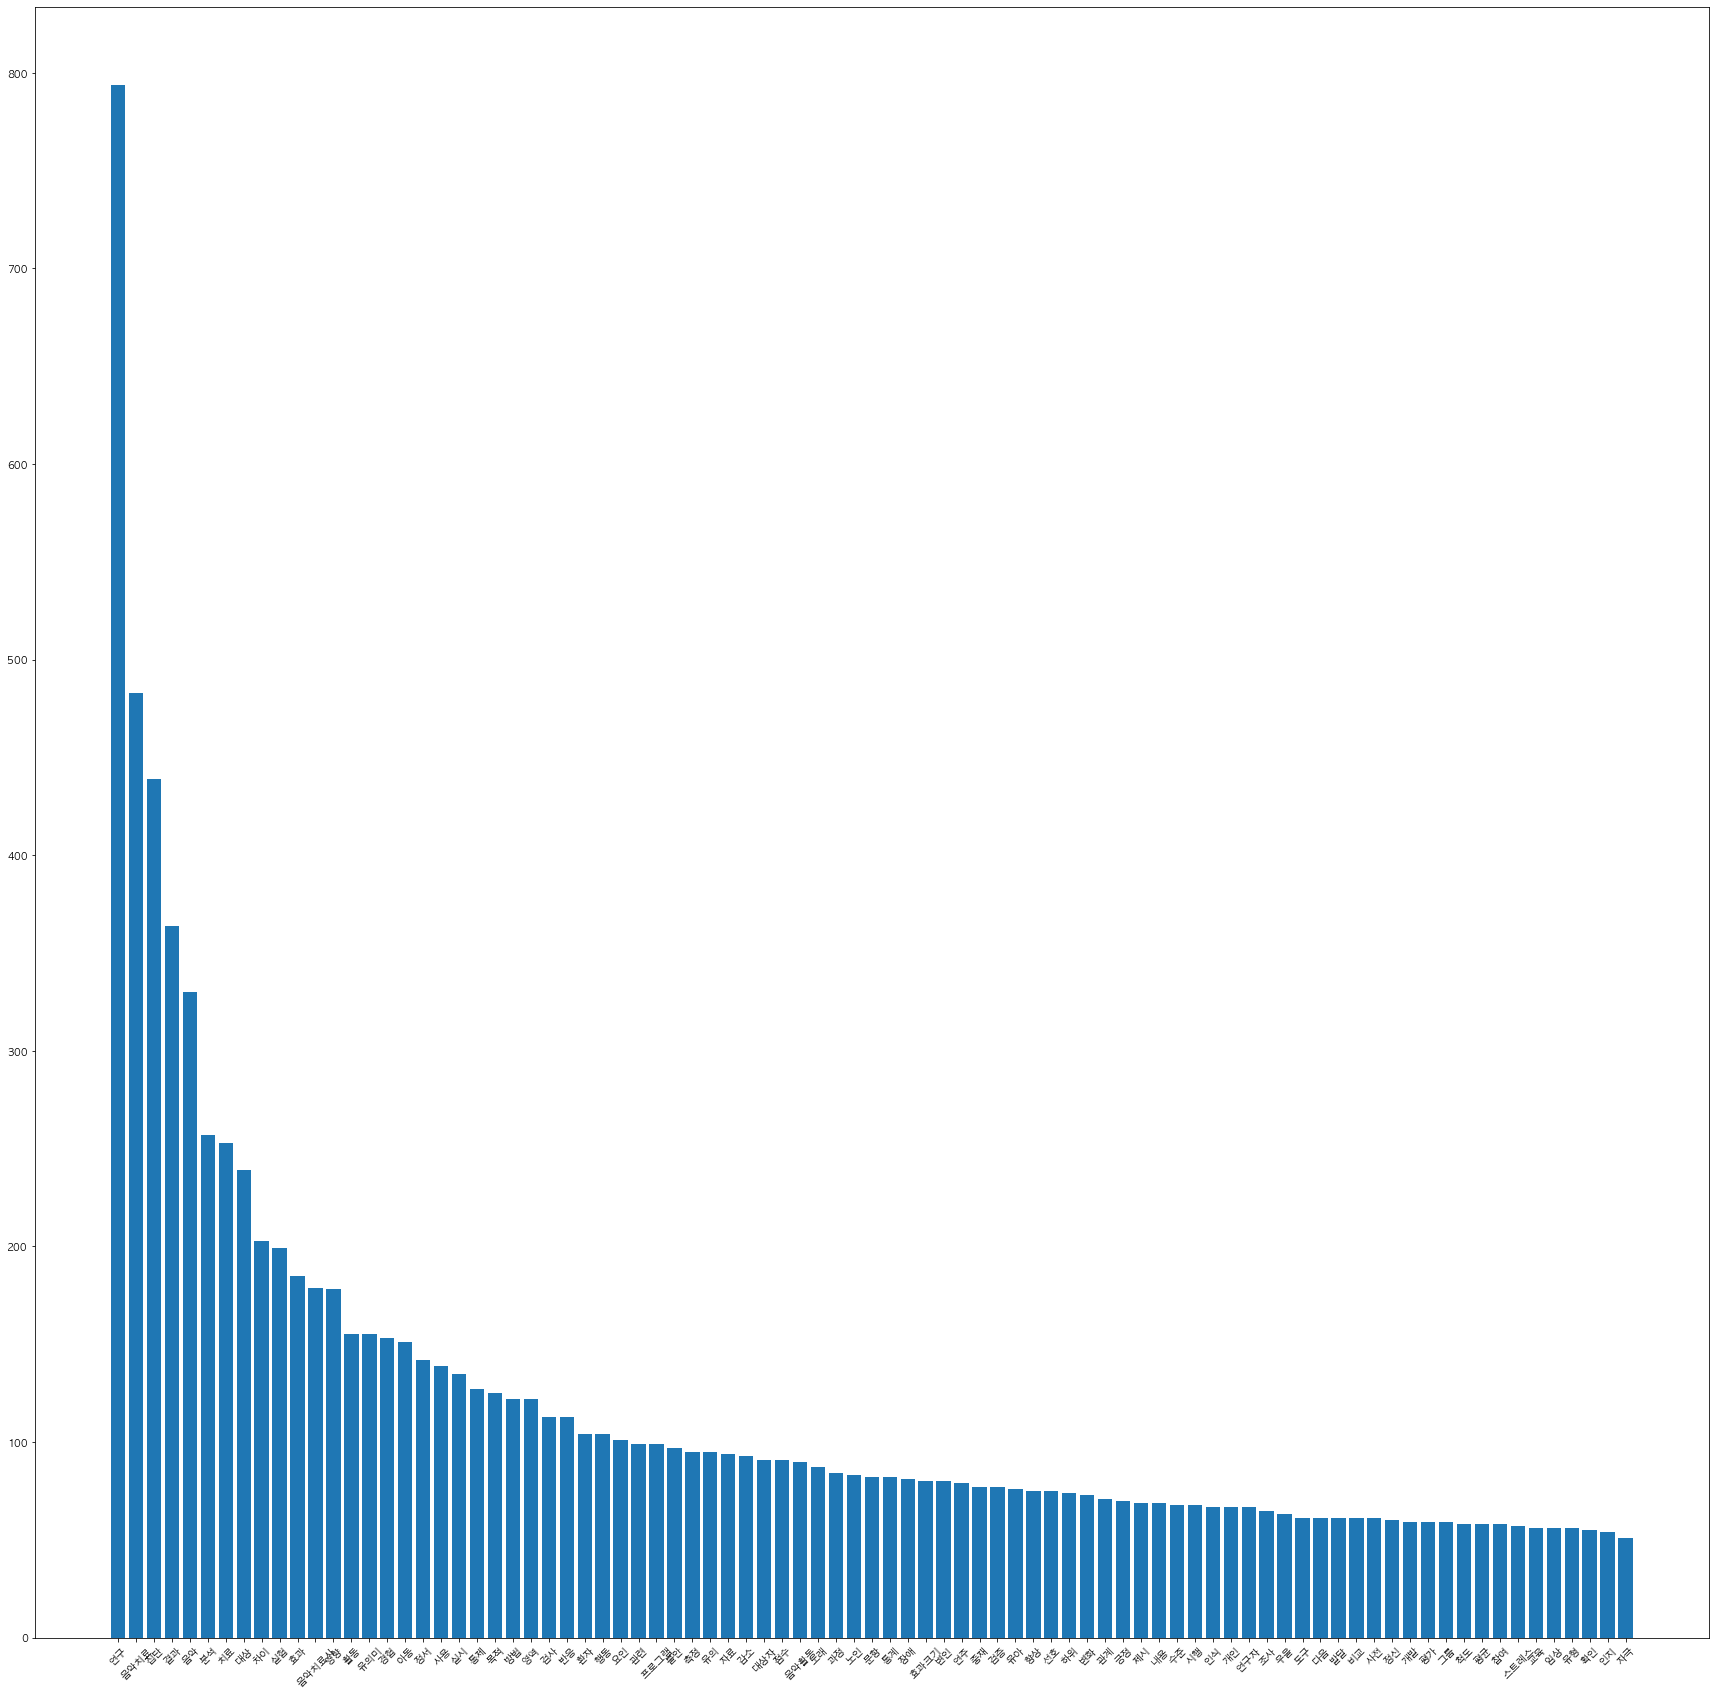

In [68]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(30, 30))
plt.bar(df_wf_top['word'], df_wf_top['frequency'])
plt.xticks(df_wf_top['word'], rotation=45)
plt.show()

3. 연도별 초록 변화

In [83]:
dataset_year = dataset.copy()
dataset_year = dataset[['year', 'abstract']]
dataset_year

,year,abstract
0,2019,본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,2019,"본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,2019,본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,2019,본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,2019,본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...
...,...,...
195,2000,본 연구는 멜로디억양치료(Melodic Intonation Therapy: MIT)...
196,1999,본 연구의 목적은 국내 정신과 관련 전문인들의 음악치료에 대한 인식과 태도를 조사하...
197,1999,본 연구는 19897년부터 1998년까지의 Journal of Music Thera...
198,1999,본 연구의 목적은 정신지체아동의 부적응행동을 감소시켜 효과적인 학습환경과 집단생활을...


In [131]:
df_year_word = dataset_year.copy()
sr_abstract = df_year_word['abstract']
komoran = Komoran(userdic='./data/dictionary_pos.tsv')
df_year_word['word'] = str()

for idx in sr_abstract.index:
    df_year_word['word'].loc[idx] = komoran.nouns(sr_abstract.loc[idx])
df_year_word.to_csv('./data/for_topic_modeling.csv', index=False, encoding='utf-8')
df_year_word

/Users/dhsong/Workspaces/Music Therapy NLP Project/Pycharm Project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,year,abstract,word
0,2019,본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...,"[연구, 예술치료, 사, 전문적 자기효능감, 측정, 수, 예술치료, 사, 자기효능감..."
1,2019,"본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,...","[연구, 델파이, 방법, 국내, 재활, 분야, 음악치료, 위치, 인식, 재활음악치료..."
2,2019,본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...,"[연구, 개인, 음악치료사, 훈련, 과정, 경험, 열등감, 인식, 통찰, 고찰, 것..."
3,2019,본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...,"[연구, 메타분석, 호스피스, 완화, 의료, 환자, 대상, 음악치료, 전체, 효과,..."
4,2019,본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...,"[연구, 수, 바, 이지, 지각, 음악치료, 전문, 요인, 탐색, 발달, 수, 바,..."
...,...,...,...
195,2000,본 연구는 멜로디억양치료(Melodic Intonation Therapy: MIT)...,"[연구, 멜로디, 억양, 치료, 유창, 실어증, 환자, 언어, 재활, 효과, 것, ..."
196,1999,본 연구의 목적은 국내 정신과 관련 전문인들의 음악치료에 대한 인식과 태도를 조사하...,"[연구, 목적, 국내, 정신, 관련, 전문인, 음악치료, 인식, 태도, 조사, 음악..."
197,1999,본 연구는 19897년부터 1998년까지의 Journal of Music Thera...,"[연구, 년, 년, 발표, 논문, 내용, 분석, 음악치료, 연구, 유형, 주제, 분..."
198,1999,본 연구의 목적은 정신지체아동의 부적응행동을 감소시켜 효과적인 학습환경과 집단생활을...,"[연구, 목적, 정신, 지체, 아동, 부적응, 행동, 감소, 효과, 학습, 환경, ..."


In [100]:
words = []
sr_word = df_year_word['word']
for idx in sr_word.index:
    lst_word = sr_word[idx]
    for w in lst_word:
        words.append(w)

counter = Counter(words)
target_words = []
for k, f in counter.most_common():
    if((len(k) >= 2) and (f >= 50)):
        target_words.append(k)
len(target_words)

85

In [115]:
years = df_year_word['year'].unique()
year_word = dict()
for year in years:
    year_word[year] = dict()
    for word in target_words:
        year_word[year][word] = 0

    sr_word = df_year_word[df_year_word['year'] == year]['word']
    for idx in sr_word.index:
        lst_word = sr_word[idx]
        for w in lst_word:
            if w in target_words:
                year_word[year][w] += 1

df_y_w = pd.DataFrame(year_word)
df_y_w.to_csv('./data/wrod_freqency_by_year.csv', encoding='utf-8', index=True)
df_y_w

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
연구,44,62,62,59,35,33,53,26,53,42,...,27,31,27,37,35,22,23,18,11,31
음악치료,40,38,37,26,12,37,19,17,31,46,...,27,20,26,13,4,11,9,18,3,11
집단,15,21,5,37,10,6,24,12,3,9,...,10,28,17,60,49,43,20,32,10,12
결과,22,31,21,30,19,18,16,8,16,29,...,19,14,11,20,18,15,9,16,11,5
음악,2,27,8,3,9,13,7,3,11,10,...,5,16,14,34,50,24,4,50,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
임상,5,7,10,2,3,3,4,1,4,2,...,1,0,3,4,0,0,0,1,0,2
유형,2,6,0,3,6,1,5,2,2,0,...,0,3,0,9,3,5,3,0,2,2
확인,9,8,4,10,4,4,2,1,0,1,...,2,0,3,1,0,0,1,0,0,1
인지,0,7,6,4,2,0,5,2,2,2,...,9,1,1,1,6,2,1,1,0,1


In [119]:
years = df_year_word['year'].unique()
year_word = dict()
for year in years:
    year_word[year] = dict()
    for word in target_words:
        year_word[year][word] = 0

    sr_word = df_year_word[df_year_word['year'] == year]['word']
    for idx in sr_word.index:
        lst_word = sr_word[idx]
        word_counted = []
        for w in lst_word:
            if (w in target_words) and (w not in word_counted):
                year_word[year][w] += 1
                word_counted.append(w)

df_y_w = pd.DataFrame(year_word)
df_y_w.to_csv('./data/wrod_freqency_by_year_num_articles.csv', encoding='utf-8', index=True)
df_y_w

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
연구,14,15,11,14,7,9,10,8,11,12,...,9,9,7,12,10,6,6,7,4,4
음악치료,9,12,8,8,4,8,4,5,9,9,...,6,3,7,4,2,2,2,2,1,2
집단,3,6,1,5,4,3,3,3,2,2,...,2,4,2,7,8,5,3,4,3,2
결과,12,15,10,14,6,8,8,8,11,10,...,9,8,8,10,10,6,6,6,4,3
음악,2,6,3,2,3,4,4,2,4,6,...,3,6,5,8,6,4,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
임상,4,6,7,2,3,3,2,1,4,2,...,1,0,1,2,0,0,0,1,0,2
유형,1,1,0,3,1,1,1,1,2,0,...,0,1,0,2,2,2,1,0,2,1
확인,5,3,2,4,3,3,2,1,0,1,...,1,0,1,1,0,0,1,0,0,1
인지,0,4,3,1,1,0,2,1,1,2,...,3,1,1,1,1,2,1,1,0,1


4. 공기 빈도 분석

In [130]:
pair_dict = {}
for a in target_words:
    pair_dict[a] = dict()
    for b in target_words:
        pair_dict[a][b] = 0

sr_word = df_year_word['word']
for idx in sr_word.index:
    lst_word = sr_word[idx]
    pair_checked = []
    for w1 in lst_word:
        if w1 in target_words:
            for w2 in lst_word:
                if w2 in target_words and w2 != w1 and ((w1, w2) not in pair_checked):
                    pair_dict[w1][w2] += 1
                    pair_checked.append((w1, w2))
df_coword = pd.DataFrame(pair_dict)
df_coword.to_csv('./data/coward_matric.csv', encoding='utf-8', index=True)
df_coword

,연구,음악치료,집단,결과,음악,분석,치료,대상,차이,실험,...,척도,평균,참여,스트레스,교육,임상,유형,확인,인지,자극
연구,0,118,76,184,84,114,81,138,89,59,...,29,34,37,16,32,44,23,32,28,11
음악치료,118,0,30,107,44,75,58,81,35,19,...,16,18,21,7,21,37,14,18,20,0
집단,76,30,0,74,28,37,26,61,54,44,...,16,19,17,7,6,7,10,9,13,6
결과,184,107,74,0,78,110,75,131,87,58,...,28,34,36,15,29,40,23,31,24,11
음악,84,44,28,78,0,54,32,53,43,27,...,13,16,14,11,12,19,14,12,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
임상,44,37,7,40,19,31,20,30,12,4,...,5,6,4,6,9,0,6,6,7,0
유형,23,14,10,23,14,17,10,20,14,8,...,2,9,0,1,4,6,0,3,3,5
확인,32,18,9,31,12,21,15,23,15,8,...,5,7,2,4,3,6,3,0,5,2
인지,28,20,13,24,11,19,14,19,13,7,...,4,5,5,1,5,7,3,5,0,1


7225